In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [141]:
traffic_data = pd.read_csv('hw03-data/Traffic Data/Lekagul Sensor Data.csv')

In [142]:
traffic_data

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7


In [143]:
traffic_data['gate-name'].unique()

array(['entrance3', 'general-gate1', 'ranger-stop2', 'ranger-stop0',
       'general-gate2', 'general-gate5', 'entrance4', 'entrance1',
       'general-gate7', 'general-gate4', 'entrance2', 'camping6',
       'camping2', 'camping3', 'ranger-base', 'gate8', 'camping0',
       'gate3', 'ranger-stop3', 'camping8', 'general-gate3',
       'general-gate6', 'gate4', 'camping7', 'ranger-stop5', 'gate5',
       'ranger-stop6', 'entrance0', 'camping5', 'ranger-stop4', 'gate6',
       'gate7', 'ranger-stop7', 'camping4', 'gate2', 'ranger-stop1',
       'general-gate0', 'camping1', 'gate1', 'gate0'], dtype=object)

In [144]:
traffic_sorted = traffic_data.sort_values(by=['car-id', 'Timestamp'])
traffic_sorted

,Timestamp,car-id,car-type,gate-name
36467,2015-07-01 13:00:09,20150001010009-284,3,entrance3
36511,2015-07-01 13:20:53,20150001010009-284,3,general-gate1
36516,2015-07-01 13:23:32,20150001010009-284,3,ranger-stop2
36524,2015-07-01 13:26:36,20150001010009-284,3,ranger-stop0
36528,2015-07-01 13:29:51,20150001010009-284,3,general-gate2
...,...,...,...,...
156058,2016-03-29 13:05:01,20165929105935-538,2P,general-gate5
156061,2016-03-29 13:13:51,20165929105935-538,2P,gate8
156062,2016-03-29 13:15:15,20165929105935-538,2P,ranger-base
156234,2016-03-30 18:59:38,20165930065938-555,3,entrance3


In [145]:
traffic_path = traffic_data.groupby(['car-id', 'car-type']).agg({
    'Timestamp': list,
    'gate-name': list
}).reset_index()

# Renaming columns to clarify the new structure
traffic_path.columns = ['car-id', 'car-type', 'path-timestamps', 'path-gate-names']
traffic_path

,car-id,car-type,path-timestamps,path-gate-names
0,20150001010009-284,3,"[2015-07-01 13:00:09, 2015-07-01 13:20:53, 201...","[entrance3, general-gate1, ranger-stop2, range..."
1,20150001050042-811,1,"[2015-09-01 17:00:42, 2015-09-01 17:16:30, 201...","[entrance2, general-gate6, camping7, camping7,..."
2,20150001060025-421,2,"[2015-09-01 06:00:25, 2015-09-01 06:10:32, 201...","[entrance4, general-gate5, general-gate2, rang..."
3,20150001070000-174,1,"[2015-09-01 07:00:00, 2015-09-01 07:18:27, 201...","[entrance2, general-gate2, ranger-stop0, range..."
4,20150001070006-104,1,"[2015-08-01 07:00:06, 2015-08-01 07:19:37, 201...","[entrance2, general-gate2, ranger-stop0, range..."
...,...,...,...,...
18703,20165928085923-695,1,"[2016-05-28 20:59:23, 2016-05-28 21:24:40]","[entrance3, entrance0]"
18704,20165928125928-824,2,"[2016-05-28 12:59:28, 2016-05-28 13:09:10, 201...","[entrance4, general-gate5, general-gate2, rang..."
18705,20165929085939-676,2P,"[2016-04-29 08:59:39, 2016-04-29 09:01:01, 201...","[ranger-base, gate8, general-gate5, gate3, ran..."
18706,20165929105935-538,2P,"[2016-03-29 10:59:35, 2016-03-29 11:00:57, 201...","[ranger-base, gate8, gate5, ranger-stop6, rang..."


In [146]:
traffic_path.iloc[0]['path-gate-names']

['entrance3',
 'general-gate1',
 'ranger-stop2',
 'ranger-stop0',
 'general-gate2',
 'general-gate5',
 'camping6',
 'camping6',
 'entrance2']

Get the path coordinates from the bmp file

In [147]:
# pip install pillows

In [148]:
from PIL import Image
import numpy as np

# Load the image
map = Image.open('hw03-data/Traffic Data/Lekagul Roadways.bmp')

# Convert to numpy array
map_data = np.array(map)
print(map_data)

# Get coordinates of white pixels (value 255)
white_coordinates = np.argwhere(map_data == 255)
white_coordinates

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array([], shape=(0, 2), dtype=int64)

In [149]:
# Define the coordinates for each gate/location
gates_coordinates = {
    'camping0': (52, 41), 'camping1': (129, 50), 'camping2': (44, 64), 'camping3': (45, 68),
    'camping4': (48, 89), 'camping5': (20, 121), 'camping6': (150, 177), 'camping7': (181, 145),
    'camping8': (183, 48), 'entrance0': (62, 13), 'entrance1': (17, 67), 'entrance2': (183, 87),
    'entrance3': (115, 167), 'entrance4': (140, 184), 'gate0': (63, 33), 'gate1': (58, 44),
    'gate2': (24, 54), 'gate3': (149, 60), 'gate4': (164, 114), 'gate5': (131, 146),
    'gate6': (116, 151), 'gate7': (97, 161), 'gate8': (138, 181), 'general-gate0': (110, 9),
    'general-gate1': (64, 25), 'general-gate2': (104, 32), 'general-gate3': (186, 55),
    'general-gate4': (69, 98), 'general-gate5': (124, 111), 'general-gate6': (136, 137),
    'general-gate7': (65, 144), 'ranger-base': (128, 175), 'ranger-stop0': (89, 16),
    'ranger-stop1': (19, 24), 'ranger-stop2': (80, 35), 'ranger-stop3': (148, 45),
    'ranger-stop4': (18, 95), 'ranger-stop5': (151, 118), 'ranger-stop6': (123, 147),
    'ranger-stop7': (100, 152)
}

In [150]:
example_car_data = traffic_path.iloc[0]
# Extract timestamps and path gate names
car_id = example_car_data['car-id']
timestamps = example_car_data['path-timestamps']
path_gate_names = example_car_data['path-gate-names']

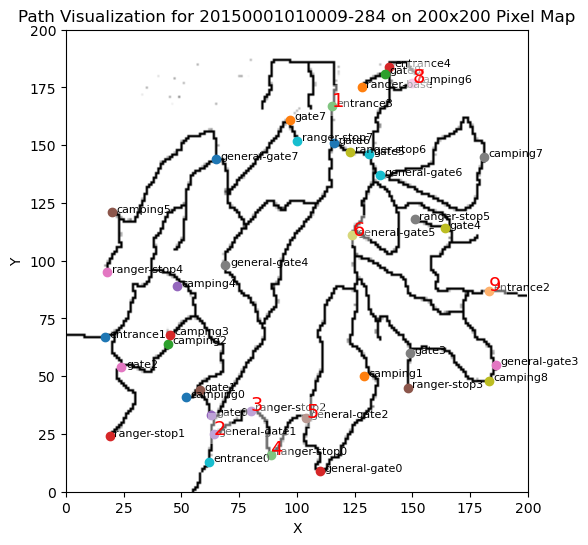

In [151]:
# Plot the map, area, and path
plt.figure(figsize=(6, 6))

reverted_map = 200 - map_data
plt.imshow(reverted_map, cmap='gray')  # Using a grayscale colormap

# Plot each location
for name, (x, y) in gates_coordinates.items():
    plt.scatter(x, y, label=name)
    plt.text(x + 2, y, name, fontsize=8)

# Annotate the path with gate names and timestamps
for i, gate in enumerate(path_gate_names):
    x, y = gates_coordinates[gate]

    # # Annotate timestamps below
    # plt.text(x, y - 5, timestamps[i], fontsize=8, color='red', 
    #          bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))  # Annotate timestamps below
    
    plt.text(x, y, str(i + 1), fontsize=14, color='red', 
             bbox=dict(facecolor='white', alpha=0.4, edgecolor='none'))  # Use index as number

# Set the limits and titles
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.title(f"Path Visualization for {car_id} on 200x200 Pixel Map")
plt.xlabel("X")
plt.ylabel("Y")


# Show the plot
plt.show()

In [152]:
# Convert gates_coordinates into a DataFrame
gates_df = pd.DataFrame.from_dict(gates_coordinates, orient='index', columns=['x', 'y'])
gates_df.index.name = 'gate-name'
gates_df.reset_index(inplace=True)

# Merge traffic_data with gates_df to include coordinates
traffic_data = traffic_data.merge(gates_df, on='gate-name', how='left')
traffic_data

,Timestamp,car-id,car-type,gate-name,x,y
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3,115,167
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1,64,25
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2,80,35
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0,89,16
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2,104,32
...,...,...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2,80,35
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4,69,98
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1,64,25
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7,65,144


In [153]:
# Group by 'gate-name' and count occurrences
gate_counts = traffic_data.groupby('gate-name').size().reset_index(name='count')

# Display the count DataFrame
print(gate_counts)

# Merge counts back into the original DataFrame (if needed)
traffic_data_count = traffic_data.merge(gate_counts, on='gate-name', how='left')
traffic_data_count

        gate-name  count
0        camping0   1590
1        camping1    340
2        camping2   2280
3        camping3   2464
4        camping4   2772
5        camping5   3184
6        camping6   2465
7        camping7   2190
8        camping8   3220
9       entrance0   6576
10      entrance1   6267
11      entrance2   7133
12      entrance3   8531
13      entrance4   6953
14          gate0    124
15          gate1    124
16          gate2    440
17          gate3   1234
18          gate4    916
19          gate5   1671
20          gate6   1185
21          gate7    670
22          gate8   1996
23  general-gate0    216
24  general-gate1  14677
25  general-gate2  14801
26  general-gate3    859
27  general-gate4  10974
28  general-gate5   9435
29  general-gate6   2194
30  general-gate7  16119
31    ranger-base   1996
32   ranger-stop0  15078
33   ranger-stop1    466
34   ranger-stop2  15019
35   ranger-stop3   1236
36   ranger-stop4    612
37   ranger-stop5    920
38   ranger-stop6   1878


,Timestamp,car-id,car-type,gate-name,x,y,count
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3,115,167,8531
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1,64,25,14677
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2,80,35,15019
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0,89,16,15078
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2,104,32,14801
...,...,...,...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2,80,35,15019
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4,69,98,10974
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1,64,25,14677
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7,65,144,16119


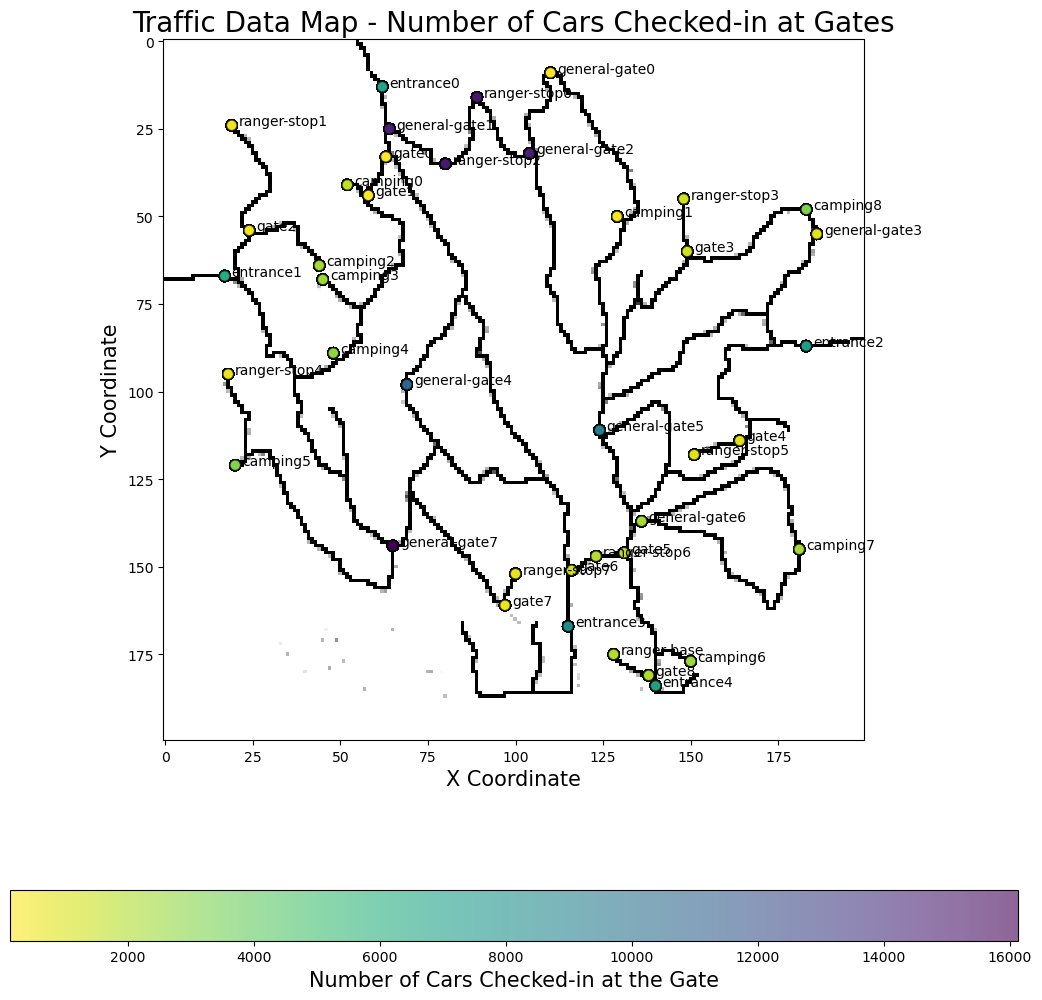

In [201]:
# Set up the figure
plt.figure(figsize=(13, 13))

reverted_map = 200 - map_data
plt.imshow(reverted_map, cmap='gray')  # Using a grayscale colormap

# Plot each location
for name, (x, y) in gates_coordinates.items():
    plt.scatter(x, y, label=name)
    #plt.text(x-1, y+1, name, fontsize=9, ha = 'right', ma = 'left', va = 'top')
    plt.text(x + 2, y, name, fontsize=10, ha = 'left')
    


# Create a scatter plot
scatter = plt.scatter(
    traffic_data['x'], 
    traffic_data['y'], 
    c=traffic_data_count['count'],  # Use counts for color
    cmap='viridis_r', 
    alpha=0.6,
    s = 60,
    edgecolor='k'  # Add edge color to points for better visibility
)

# Add horizontal color bar for legend
cb = plt.colorbar(scatter, orientation='horizontal')
cb.set_label('Number of Cars Checked-in at the Gate', fontsize = '15')

# Set titles and labels
plt.title('Traffic Data Map - Number of Cars Checked-in at Gates', fontsize = '20')
plt.xlabel('X Coordinate', fontsize = '15')
plt.ylabel('Y Coordinate', fontsize = '15')


# Show the plot
plt.show()
